In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

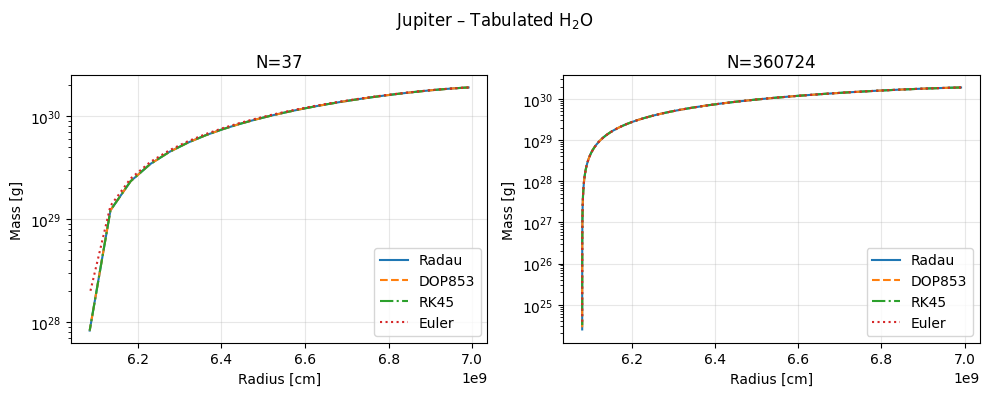

In [3]:
sim_names = {
    1 : '01_ideal_gas',
    2 : '02_polytropic',
    3 : '03_analytical_Fe',
    4 : '04_analytical_MgSiO3',
    5 : '05_tabulated_H',
    6 : '06_tabulated_H2O'
}

methods = ['Euler', 'RK45', 'DOP853', 'Radau' ][::-1]
planet = 'Jupiter'
# ------------------- load ------------------
datas_1 = []
datas_2 = []
for method in methods:
    file_name = f'38_{planet}_{sim_names[6]}_{method}_theta_2.csv'
    file_path = os.path.join('data', 'simulation_results', 'plot_3', file_name)
    data = np.loadtxt(file_path, skiprows=1, delimiter=',') 
    datas_1.append(data)

    file_name = f'{planet}_{sim_names[6]}_{method}_theta_2.csv'
    file_path = os.path.join('data', 'simulation_results', 'plot_3', file_name)
    data = np.loadtxt(file_path, skiprows=1, delimiter=',') 
    datas_2.append(data)

# ------------------- plot ------------------
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5))]
for data_1, data_2, method, linestyle in zip(datas_1, datas_2, methods, linestyles):
    N = len(data_1)
    axs[0].plot(data_1[:,0], data_1[:,1], label=method, linestyle=linestyle)
    axs[0].set_yscale('log')
    axs[0].set_xlabel('Radius [cm]')
    axs[0].set_ylabel('Mass [g]')
    axs[0].set_title(f'N={N}')
    axs[0].grid(True, alpha=0.3)
    axs[0].legend()

    N = len(data_2)
    axs[1].plot(data_2[:,0], data_2[:,1], label=method, linestyle=linestyle)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Radius [cm]')
    axs[1].set_ylabel('Mass [g]')
    axs[1].set_title(f'N={N}')
    axs[1].grid(True, alpha=0.3)
    axs[1].legend()

plt.suptitle('Jupiter \u2013 Tabulated H$_2$O')
plt.tight_layout()

file_name = 'plot_3_different_solver.pdf'

folder_path = os.path.join('plots')
file_path = os.path.join(folder_path, file_name)
os.makedirs(folder_path, exist_ok=True)
plt.savefig(file_path)

plt.show()
plt.close()
